# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [6]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [9]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
print(df_hh_income[df_hh_income["Median Income"].isna()])
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(0)


      Geographic Area                    City Median Income
29119              WY              Albany CDP           NaN
29121              WY              Alcova CDP           NaN
29123              WY    Alpine Northeast CDP           NaN
29126              WY      Antelope Hills CDP           NaN
29129              WY           Arlington CDP           NaN
29130              WY   Arrowhead Springs CDP           NaN
29132              WY       Atlantic City CDP           NaN
29133              WY              Auburn CDP           NaN
29139              WY             Bedford CDP           NaN
29140              WY       Bessemer Bend CDP           NaN
29141              WY              Beulah CDP           NaN
29142              WY            Big Horn CDP           NaN
29144              WY           Bondurant CDP           NaN
29145              WY             Boulder CDP           NaN
29152              WY           Carpenter CDP           NaN
29153              WY              Carte

In [11]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [12]:
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [13]:
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [14]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [15]:
df_pct_poverty.poverty_rate[df_pct_poverty.poverty_rate == "-"] = 0

df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [16]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [17]:
df_pct_poverty_state_mean = df_pct_poverty[["Geographic Area","poverty_rate"]].groupby(["Geographic Area"], 
                                                as_index=False).mean("poverty_rate").sort_values("poverty_rate")
df_pct_poverty_state_mean

,Geographic Area,poverty_rate
31,NJ,8.16
50,WY,9.06
6,CT,9.14
19,MA,9.55
20,MD,10.27
39,RI,10.37
34,NY,11.64
44,UT,11.72
28,ND,12.13
12,IA,12.23


In [18]:
fig = px.bar(df_pct_poverty_state_mean,
                y="Geographic Area",
                x="poverty_rate",
                orientation="h",
                color="poverty_rate",
                color_continuous_scale="armyrose",
                height=1000,
                title="USA - AVERAGE POVERTY RATE PER STATE"

            )
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [19]:
df_pct_completed_hs.percent_completed_hs[df_pct_completed_hs.percent_completed_hs == "-"] = 0
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [20]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [21]:
df_pct_completed_hs_state_mean = df_pct_completed_hs[["Geographic Area", "percent_completed_hs"]].groupby(["Geographic Area"], 
                                    as_index=False).mean("percent_completed_hs").sort_values("percent_completed_hs", ascending=False)

In [22]:
fig = px.bar(df_pct_completed_hs_state_mean,
                x="percent_completed_hs", 
                y="Geographic Area",
                color="percent_completed_hs",
                color_continuous_scale="agsunset",
                height=1000,
                title="USA - High School Completion Rate Per State"

            )
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [23]:
df_pct_poverty_state_mean.tail()

,Geographic Area,poverty_rate
32,NM,22.51
2,AR,22.96
10,GA,23.66
3,AZ,25.27
25,MS,26.88


In [24]:
df_pct_completed_hs_state_mean.tail()

,Geographic Area,percent_completed_hs
18,LA,79.12
32,NM,78.97
10,GA,78.63
25,MS,78.47
43,TX,74.09


In [25]:
df_poverty_vs_completion_hs = pd.merge(df_pct_poverty_state_mean,df_pct_completed_hs_state_mean)
df_poverty_vs_completion_hs.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,NJ,8.16,90.52
1,WY,9.06,83.97
2,CT,9.14,91.59
3,MA,9.55,92.03
4,MD,10.27,88.08


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=df_poverty_vs_completion_hs["Geographic Area"], 
    y=df_poverty_vs_completion_hs["poverty_rate"], name="Poverty Rate"),secondary_y=False)

fig.add_trace(go.Scatter(x=df_poverty_vs_completion_hs["Geographic Area"], 
    y=df_poverty_vs_completion_hs["percent_completed_hs"], name="High School Completion Rate"),secondary_y=True)



# Add figure title
fig.update_layout(
    title_text="USA : Poverty Rate Vs High School Completion Rate"
)

# Set x-axis title
fig.update_xaxes(title_text="USA States")

# Set y-axes titles
fig.update_yaxes(title_text="Poverty Rate", secondary_y=False)
fig.update_yaxes(title_text="High School Completion Rate", secondary_y=True)

fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

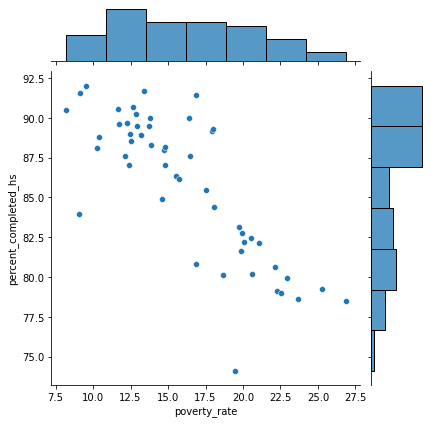

In [27]:
sns.jointplot(data=df_poverty_vs_completion_hs,
            x="poverty_rate",
            y="percent_completed_hs")
plt.show()

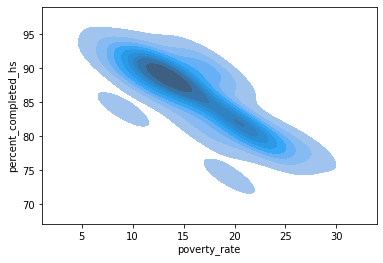

In [28]:
sns.kdeplot(data=df_poverty_vs_completion_hs,
            x="poverty_rate",
            y="percent_completed_hs",
            shade=True
            )
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 


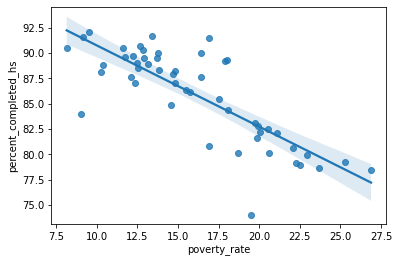

In [29]:
sns.regplot(data=df_poverty_vs_completion_hs,
            x="poverty_rate",
            y="percent_completed_hs",
            )
plt.show()

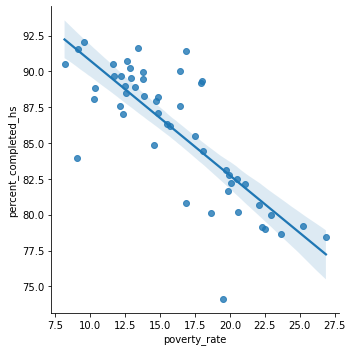

In [30]:
sns.lmplot(data=df_poverty_vs_completion_hs,
            x="poverty_rate",
            y="percent_completed_hs",
            )
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [31]:
df_share_race_per_state = df_share_race_city

df_share_race_per_state.share_white = pd.to_numeric(df_share_race_per_state.share_white, errors='coerce')
df_share_race_per_state.share_black = pd.to_numeric(df_share_race_per_state.share_black, errors='coerce')
df_share_race_per_state.share_native_american = pd.to_numeric(df_share_race_per_state.share_native_american, errors='coerce')
df_share_race_per_state.share_asian = pd.to_numeric(df_share_race_per_state.share_asian, errors='coerce')
df_share_race_per_state.share_hispanic = pd.to_numeric(df_share_race_per_state.share_hispanic, errors='coerce')

df_share_race_per_state = df_share_race_per_state[
    ["Geographic area","share_white","share_black","share_native_american","share_asian","share_hispanic"]].groupby(
    "Geographic area").agg(
    {
    "share_white":pd.Series.sum,
    "share_black":pd.Series.sum,
    "share_native_american":pd.Series.sum,
    "share_asian":pd.Series.sum,
    "share_hispanic":pd.Series.sum,
    }
)

denominator = df_share_race_per_state["share_white"] + df_share_race_per_state["share_black"] + df_share_race_per_state[
    "share_native_american"] + df_share_race_per_state["share_asian"] + df_share_race_per_state["share_hispanic"]

df_share_race_per_state["share_white"] = 100 * df_share_race_per_state["share_white"]/denominator
df_share_race_per_state["share_black"] = 100 * df_share_race_per_state["share_black"]/denominator
df_share_race_per_state["share_native_american"] = 100 * df_share_race_per_state["share_native_american"]/denominator
df_share_race_per_state["share_asian"] = 100 * df_share_race_per_state["share_asian"]/denominator
df_share_race_per_state["share_hispanic"] = 100 * df_share_race_per_state["share_hispanic"]/denominator

df_share_race_per_state = df_share_race_per_state.sort_values("share_white")
df_share_race_per_state

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
DC,37.71,49.66,0.29,3.43,8.91
HI,47.10,1.51,0.55,36.21,14.62
AK,47.74,0.59,47.97,1.45,2.25
NM,51.37,0.52,12.05,0.39,35.68
MS,53.74,41.79,1.61,0.55,2.32
AZ,54.31,0.87,25.91,0.66,18.26
SC,61.67,32.67,0.46,0.74,4.45
GA,61.71,30.20,0.30,1.47,6.32
TX,63.77,4.54,0.51,0.78,30.40


In [32]:
fig = px.bar(df_share_race_per_state)

# Add figure title
fig.update_layout(
    title_text="USA : % SHARE OF RACE PER STATE"
)

# Set x-axis title
fig.update_xaxes(title_text="USA States")

# Set y-axes titles
fig.update_yaxes(title_text="% Share of the Races")

fig.show()


In [33]:
df_share_race_per_state.describe()

,share_white,share_black,share_native_american,share_asian,share_hispanic
count,51.00,51.00,51.00,51.00,51.00
mean,79.51,7.71,3.52,2.01,7.24
std,15.16,11.55,7.93,5.03,7.29
min,37.71,0.23,0.16,0.29,0.91
25%,71.31,0.80,0.33,0.51,2.76
50%,85.26,2.93,0.66,0.92,5.01
75%,91.63,6.96,2.57,1.57,8.34
max,96.55,49.66,47.97,36.21,35.68


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [34]:

df_fatalities_race = df_fatalities[["race"]].groupby(["race"]).value_counts()
df_fatalities_race

race
A      39
B     618
H     423
N      31
O      28
W    1201
dtype: int64

In [35]:
fig = px.pie(df_fatalities_race, 
                values=df_fatalities_race.values, 
                names=df_fatalities_race.index,
                title="USA : Police Fatalities by Race",
                hole = 0.5)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [36]:
 
df_fatalities_gender = df_fatalities[["gender"]].groupby(["gender"]).value_counts()
df_fatalities_gender

gender
F     107
M    2428
dtype: int64

In [37]:
fig = px.pie(df_fatalities_gender, 
                values=df_fatalities_gender.values, 
                names=df_fatalities_gender.index,
                title="USA : Police Fatalities by Gender",
                hole = 0.3)
fig.show()

In [38]:
fig = px.histogram(df_fatalities["gender"], 
                title="USA : Police Fatalities by Gender",
                color=df_fatalities["gender"],
                orientation="h"
                )
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [39]:
fig = px.box(df_fatalities, x=df_fatalities.manner_of_death, y=df_fatalities.age, facet_col=df_fatalities.gender)
fig.show()

In [40]:
fig = px.histogram(df_fatalities, x=df_fatalities.manner_of_death, facet_col=df_fatalities.gender)
fig.show()

In [41]:
fig = px.histogram(df_fatalities, 
x=df_fatalities.age, 
facet_col=df_fatalities.gender,
color=df_fatalities.gender,
color_discrete_sequence=["purple", "pink"],
nbins=20
)

fig.update_xaxes(dtick=5)
fig.update_layout(bargap=0.2)
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [42]:
df_fatalities_weapon = df_fatalities["armed"].value_counts(ascending=False)[:20]
fig = px.bar(df_fatalities_weapon, orientation="h", height=500, color=df_fatalities_weapon.index)
fig.show()

In [43]:

df_fatalities_weapon_Percent = pd.DataFrame(100 * df_fatalities["armed"].value_counts(ascending=True)/df_fatalities["armed"].count())
df_fatalities_weapon_Percent = df_fatalities_weapon_Percent.round(1)


In [44]:

from turtle import title


fig = px.bar(df_fatalities_weapon_Percent[-20:], 
            orientation="h", 
            color=df_fatalities_weapon_Percent.armed[-20:],
            text=df_fatalities_weapon_Percent.armed[-20:],
            color_continuous_scale="earth_r",
            height=600,
            title="Percentage of TOP 20 Weapons During Police Controntation Leading to Fatality")

fig.update_traces(textposition='outside')

# Set x-axis title
fig.update_xaxes(title_text="Type of Weapon")

# Set y-axes titles
fig.update_yaxes(title_text="% Peecentage Value")

fig.show()

In [45]:
df_fatalities_weapon_Percent

,armed
pen,0.00
spear,0.00
flashlight,0.00
metal hand tool,0.00
pick-axe,0.00
...,...
undetermined,4.60
unarmed,6.80
vehicle,7.00
knife,14.80


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [46]:
print(f'Killed 25 years and younger = { round(100 * df_fatalities["age"][df_fatalities["age"] <= 25].count() / df_fatalities["age"].count(), 2)} percent')

Killed 25 years and younger = 22.5 percent


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

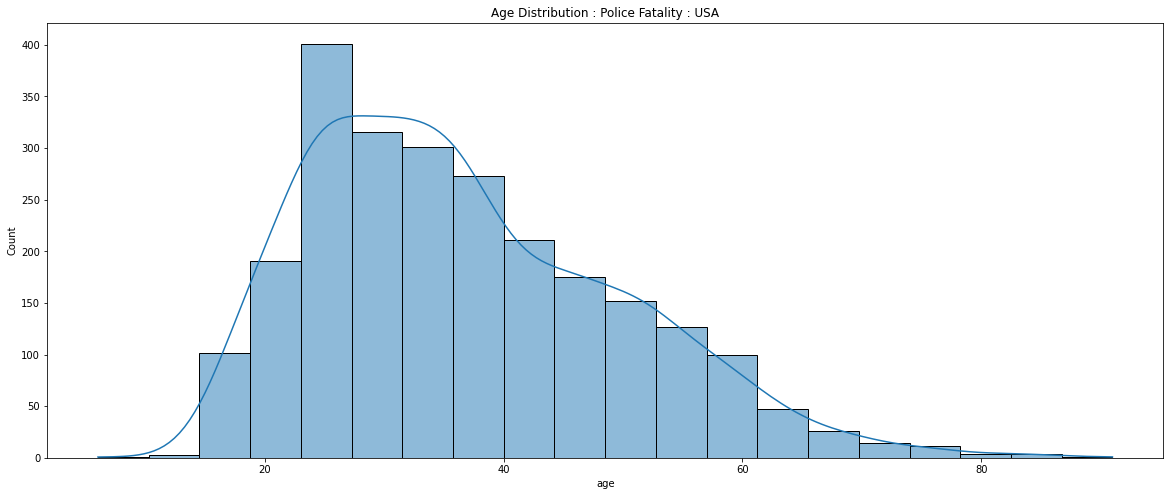

In [47]:
plt.figure(figsize=(20,8))

sns.histplot(data=df_fatalities,
x=df_fatalities["age"],
kde=True,
bins=20)

plt.title("Age Distribution : Police Fatality : USA")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

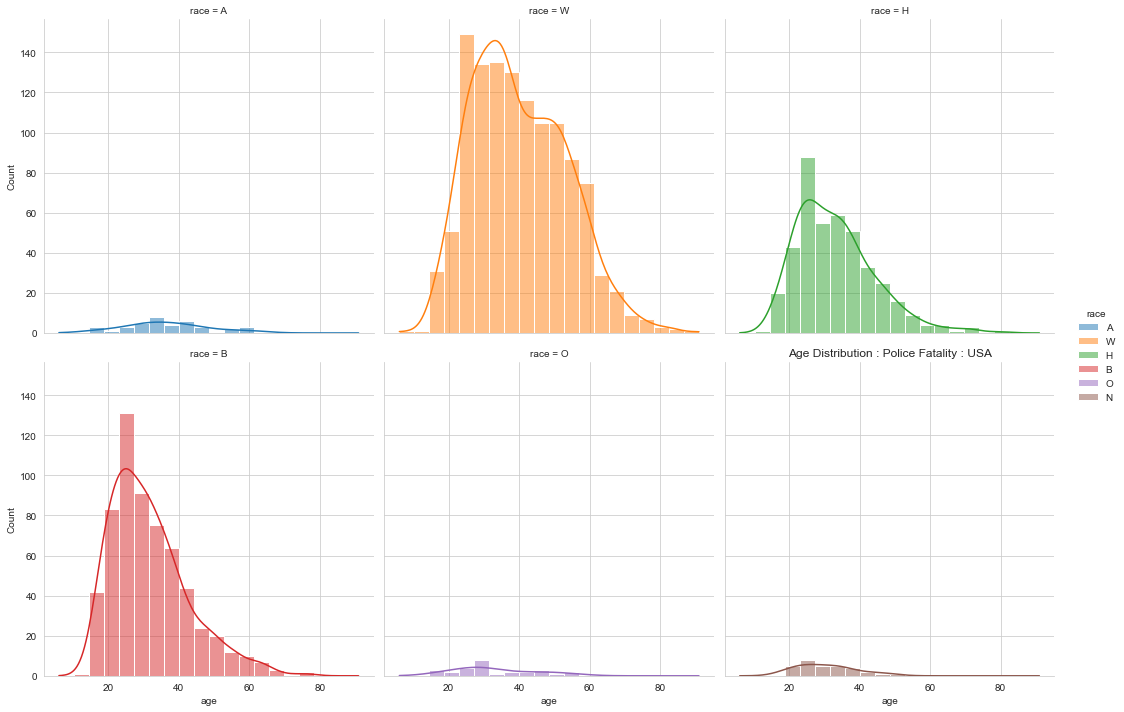

In [48]:

sns.set_style("whitegrid")

sns.displot(data=df_fatalities,
x=df_fatalities["age"],
col=df_fatalities["race"],
hue=df_fatalities["race"],
col_wrap=3,
aspect=1,
kde=True,
bins=20)


plt.title("Age Distribution : Police Fatality : USA")
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [49]:
fig = px.histogram(df_fatalities, color=df_fatalities.race,x=df_fatalities.race,
title="USA Police Fatalities by RACE: Jan 2015 to July 2017")
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [50]:
df_fatalities_mental = df_fatalities.signs_of_mental_illness.value_counts()

fig = px.pie(df_fatalities_mental, 
                values=df_fatalities_mental.values, 
                names=df_fatalities_mental.index,
                title="USA : Police Fatalities with Mental Illness",
                hole = 0.5)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [51]:
df_fatalities_top_cities = df_fatalities["city"].value_counts()[:10]
df_fatalities_top_cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [52]:

fig = px.scatter(df_fatalities_top_cities, 
color=df_fatalities_top_cities.values,
size=df_fatalities_top_cities.values,
title="Top 10 Dangerous Cities: USA. Likelyhood for Fatality by Police HIGH")

# Set x-axis title
fig.update_xaxes(title_text="City")

# Set y-axes titles
fig.update_yaxes(title_text="Police Fatalities")
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [53]:
df_fatalities_top_cities_race = df_fatalities. \
                                groupby(["city","race"], as_index=False). \
                                    agg({"name":pd.Series.count})

In [54]:
df_fatalities_top_cities = pd.DataFrame(df_fatalities_top_cities)
df_fatalities_top_cities.reset_index(inplace=True)
df_fatalities_top_cities.columns = ["city","total"]


In [55]:
df_fatalities_top_cities_race_final = pd.merge(df_fatalities_top_cities, df_fatalities_top_cities_race)
df_fatalities_top_cities_race_final.columns = ["city","total","race","race_death"]
df_fatalities_top_cities_race_final["race_percent"] = 100 * \
    df_fatalities_top_cities_race_final["race_death"]/df_fatalities_top_cities_race_final["total"]

df_fatalities_top_cities_race_final.set_index("city", inplace=True)
df_fatalities_top_cities_race_final

,total,race,race_death,race_percent
city,,,,
Los Angeles,39,A,1,2.56
Los Angeles,39,B,10,25.64
Los Angeles,39,H,19,48.72
Los Angeles,39,W,6,15.38
Phoenix,31,B,2,6.45
Phoenix,31,H,11,35.48
Phoenix,31,N,3,9.68
Phoenix,31,W,12,38.71
Houston,27,A,1,3.70


In [56]:
fig = px.bar(df_fatalities_top_cities_race_final, 
    x=df_fatalities_top_cities_race_final.index,
    y=df_fatalities_top_cities_race_final.race_percent,
    color=df_fatalities_top_cities_race_final.race,
    barmode="group",
    title="America's most dangerous cities: Percentage of Race Fatalities by Police "
    )

fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [57]:
df_fatalities_states = df_fatalities.state.value_counts()
df_fatalities_states.head()

CA    424
TX    225
FL    154
AZ    118
OH     79
Name: state, dtype: int64

In [63]:
fig = px.choropleth(df_fatalities_states, 
                locations=df_fatalities_states.index, 
                color=df_fatalities_states.values,
                color_continuous_scale="ylorrd",
                locationmode="USA-states", 
                scope="usa",
                title="Police Fatalities in the US States: 2015 to 2017"
                )
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [59]:
df_fatalities["date"] = pd.to_datetime(df_fatalities.date,format="%d/%m/%y")

In [60]:
df_fatalities_date_count =  df_fatalities[["date","name"]].groupby("date",as_index=False).agg({"name":pd.Series.count})
df_fatalities_date_count["cumsum"] = df_fatalities_date_count.name.cumsum()
df_fatalities_date_count.set_index("date", inplace=True)
df_fatalities_date_count.columns = ["Fatalities","Cumsum"]
df_fatalities_date_count


,Fatalities,Cumsum
date,,
2015-01-02,2,2
2015-01-03,1,3
2015-01-04,3,6
2015-01-05,1,7
2015-01-06,4,11
...,...,...
2017-07-26,4,2524
2017-07-27,5,2529
2017-07-28,3,2532


In [61]:
fig = px.line(df_fatalities_date_count,y=df_fatalities_date_count.Fatalities)
fig.show()

#nothing has changed


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [62]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
